<a href="https://colab.research.google.com/github/Saurav1934/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ Import Required Libraries
# =============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
# 1️⃣ Load dataset
df = pd.read_csv("heart_disease_extended.csv")   # use your dataset name here

In [ ]:
print("=== First 10 Records ===")
print(df.head(10))
print("\n=== Dataset Info ===")
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Statistical Summary ===")
print(df.describe())

=== First 10 Records ===
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  ...  \
0   60    1   1       141   301    0        1      174      0  3.477545  ...   
1   57    1   2       138   209    0        0      134      0  2.107001  ...   
2   62    1   0       148   156    0        0      152      0  0.806260  ...   
3   52    1   0       142   241    0        1      169      0  1.019675  ...   
4   40    1   0       132   251    0        0      159      0  0.160803  ...   
5   56    0   0       158   409    0        0      146      0  0.952788  ...   
6   52    1   3       152   298    1        1      178      0  1.200000  ...   
7   68    1   0       118   225    0        0      140      1  0.870184  ...   
8   54    1   3       119   238    0        0      201      0  3.001010  ...   
9   58    1   1       120   284    0        0      160      0  1.800000  ...   

   family_history  diabetes  hypertension  medication_count  stress_level  \
0             1.0

In [ ]:
# =============================
# 3️⃣ Data Cleaning
# =============================
# Fill missing numeric values with median
df = df.fillna(df.median(numeric_only=True))

In [ ]:
# 4️⃣ Define Features and Target
# =============================
target = 'target'
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# 5️⃣ Encode Categorical Columns Automatically
# =============================
categorical_cols = [c for c in X.columns if X[c].dtype == 'object' or X[c].nunique() <= 6]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
# =============================
# 6️⃣ Split Data into Train & Test
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# =============================
# 7️⃣ Model Training (Random Forest)
# =============================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=300, random_state=42)

In [ ]:
df['chol_age_ratio'] = df['chol'] / df['age']
df['bp_diff'] = df['trestbps'] - 80
df['is_tachycardic'] = (df['thalach'] > 120).astype(int)
df['risk_factor_count'] = df[['fbs', 'exang']].sum(axis=1)


In [ ]:
# =============================
# 8️⃣ Model Evaluation
# =============================
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       957
           1       0.94      0.92      0.93      1043

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

ROC AUC Score: 0.9823


In [ ]:
# Display the head of the loaded dataframe
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,family_history,diabetes,hypertension,medication_count,stress_level,diet_quality,sleep_hours,exercise_freq_per_week,avg_exercise_duration_mins,sedentary_hours_per_day
0,60,1,1,141,301,0,1,174,0,3.477545,...,1.0,0.0,0.0,1.0,5.568769,0.0,6.244959,1.0,53.805561,10.292382
1,57,1,2,138,209,0,0,134,0,2.107001,...,0.0,1.0,1.0,3.0,8.891184,1.0,6.132870,2.0,23.788086,6.703423
2,62,1,0,148,156,0,0,152,0,0.806260,...,0.0,0.0,0.0,0.0,5.732726,2.0,8.243508,0.0,60.675963,4.876090
3,52,1,0,142,241,0,1,169,0,1.019675,...,0.0,0.0,0.0,2.0,3.715348,2.0,7.880968,3.0,64.931261,5.539110
4,40,1,0,132,251,0,0,159,0,0.160803,...,1.0,0.0,1.0,4.0,5.999716,1.0,7.781530,2.0,0.000000,5.436916


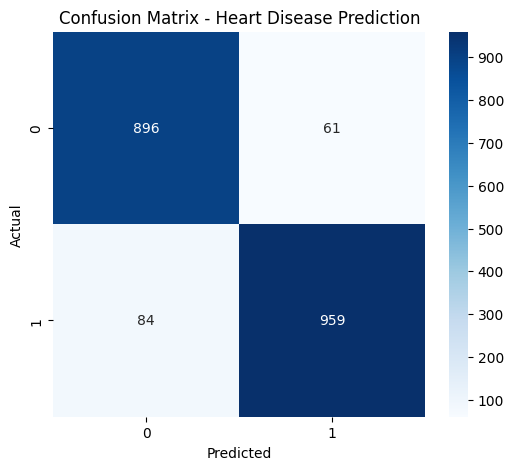

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

meta_model = LogisticRegression()
stacked = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacked.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

/tmp/ipython-input-1567113193.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importances.head(20).index, x=importances.head(20).values, palette="coolwarm")


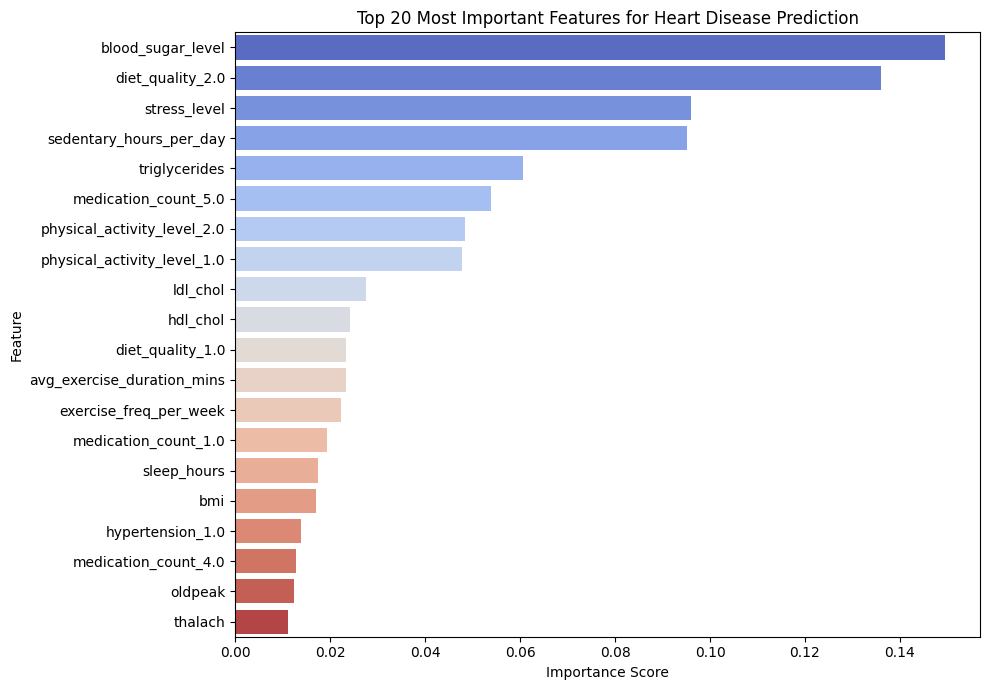

In [ ]:
# =============================
# 9️⃣ Feature Importance Visualization
# =============================
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(y=importances.head(20).index, x=importances.head(20).values, palette="coolwarm")
plt.title("Top 20 Most Important Features for Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()